In [9]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = load_iris()

In [11]:
dataset = pd.DataFrame(data.data , columns = data.feature_names)

In [15]:
dataset.head().T

,0,1,2,3,4
sepal length (cm),5.1,4.9,4.7,4.6,5.0
sepal width (cm),3.5,3.0,3.2,3.1,3.6
petal length (cm),1.4,1.4,1.3,1.5,1.4
petal width (cm),0.2,0.2,0.2,0.2,0.2


In [17]:
def random_centroid(dataset , k):
    centroids = []
    for i in range(k):
        centroid = dataset.apply(lambda x:float(x.sample().to_numpy()[0]))
        centroids.append(centroid)
    return pd.concat(centroids , axis = 1)

In [19]:
r_centroid = random_centroid(dataset,3)

In [21]:
r_centroid

,0,1,2
sepal length (cm),5.1,6.0,4.8
sepal width (cm),2.9,2.0,3.6
petal length (cm),5.6,1.4,1.6
petal width (cm),1.7,2.0,1.4


In [23]:
def get_labels(dataset , r_centroid):
    distance = r_centroid.apply(lambda x:np.sqrt(((dataset - x) ** 2).sum(axis=1)))
    return distance.idxmin(axis=1)

In [25]:
labels = get_labels(dataset , r_centroid) 

In [27]:
labels

0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [29]:
labels.value_counts()

0    97
2    53
Name: count, dtype: int64

In [31]:
def new_centroids(dataset , labels , k):
    return dataset.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [33]:
from sklearn.decomposition import PCA #help to visulize the data , because we re in 5 dimension but it will arange the dimension
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [35]:
def plot_clusters(dataset0 , labels , centroid , iteration):
    pca = PCA(n_components = 2) #to tell to return our data of 5 columns into 2 columns 
    data_2d = pca.fit_transform(dataset0) #transform the data and then execute
    centroid_2d = pca.transform(centroid.T)
    clear_output(wait=True)
    plt.title(f'Iteration number {iteration}')
    plt.scatter(x=data_2d[:,0] , y=data_2d[:,1] , c=labels)
    plt.scatter(x=centroid_2d[:,0] , y=centroid_2d[:,1])
    plt.show()

In [3]:
def Kmeans(dataset , labels , k , r_centroid , max_iteration):
    
    
    iteration = 0
    old_centroid = pd.DataFrame()
    r_centroid = random_centroid(dataset , k)
    
    while iteration < max_iteration and not r_centroid.equals(old_centroid):
        
       
        old_centroid = r_centroid
        labels = get_labels(dataset , r_centroid)
        r_centroid = new_centroids(dataset,labels ,k)
        plot_clusters(dataset , labels , r_centroid , iteration) 
        iteration += 1

    return r_centroid , labels
    
    

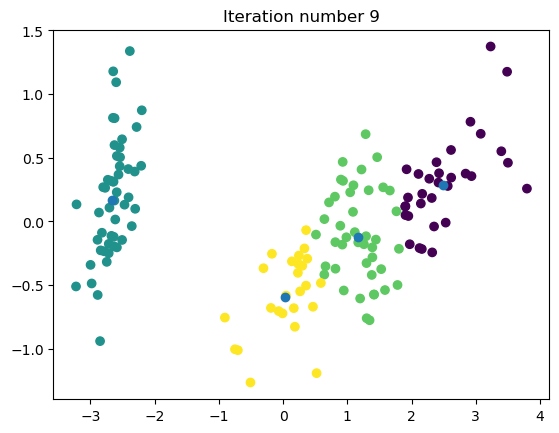

In [37]:
centroid0 , labels0 = Kmeans(dataset , labels , 5 , r_centroid ,100)

In [41]:
centroid0.head()

,0,2,3,4
sepal length (cm),6.895008,4.993841,6.206576,5.498512
sepal width (cm),3.086679,3.407080,2.847236,2.587058
petal length (cm),5.830520,1.451734,4.776537,3.889751
petal width (cm),2.117328,0.226582,1.591918,1.191804


In [239]:
labels0

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    2
Length: 150, dtype: int64